# YOLO
YOLO (You Only Look Once) is one of the most popular and efficient object detection algorithms. It can detect multiple objects in real-time in an image or video. YOLO is a single-stage detector, meaning it predicts the bounding boxes and class probabilities in one forward pass of the network, which makes it fast and suitable for real-time applications.

---
To Install yolov5  
`pip install yolov5`

In [1]:
import torch
from PIL import Image

YOLO hub: https://github.com/ultralytics/yolov5

In [2]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s')  # 'yolov5s' is a smaller version of YOLOv5

Using cache found in /Users/aayamojha/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-12-29 Python-3.12.4 torch-2.2.2 CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


# Prediction using YOLO

In [5]:
img_path = "../images/cat-7210553_1280.jpg"
img = Image.open(img_path)

In [6]:
results = model(img)

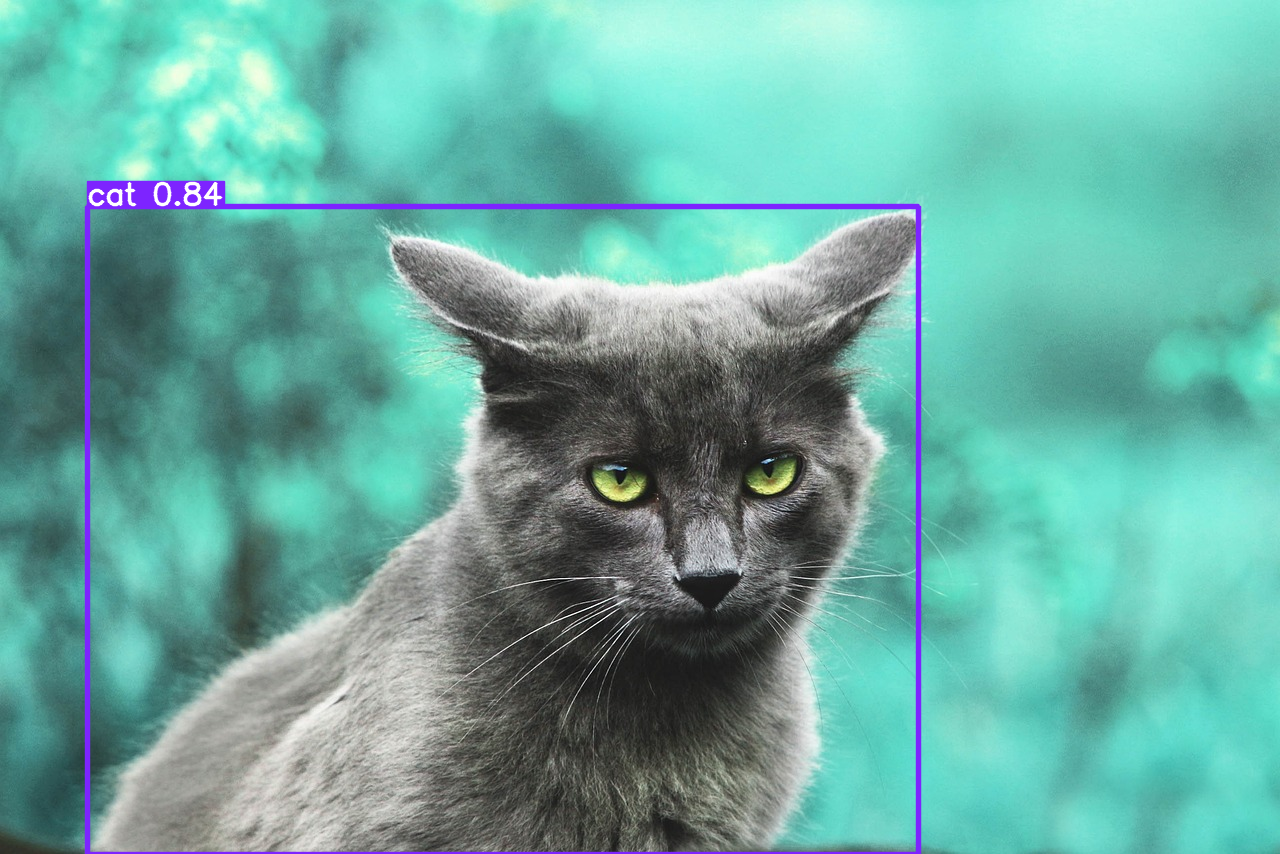

In [7]:
results.show()  

# Real Time YOLO

In [3]:
import torch
import cv2
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

In [4]:
%matplotlib inline

def run_yolo_webcam():    
    # Initialize webcam
    cap = cv2.VideoCapture(0)
    
    if not cap.isOpened():
        print("Error: Could not open webcam")
        return
    
    # Create a figure for display
    plt.ion()
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.axis('off')
    
    print("YOLOv5 detection started. Run cell again or interrupt kernel to stop.")
    
    while True:
        # Capture frame-by-frame
        ret, frame = cap.read()
        
        if not ret:
            print("Error: Can't receive frame")
            break
        
        # Convert the frame to RGB for YOLO
        frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame_rgb)
        
        # Perform detection
        results = model(img)
        
        # Get frame with detection boxes
        frame_with_boxes = np.array(results.render()[0])
        
        # Clear previous output and show new frame
        clear_output(wait=True)
        ax.clear()
        ax.imshow(frame_with_boxes)
        ax.axis('off')
        display(fig)
        plt.pause(0.1)
        
    # Release everything when done
    cap.release()
    plt.close(fig)


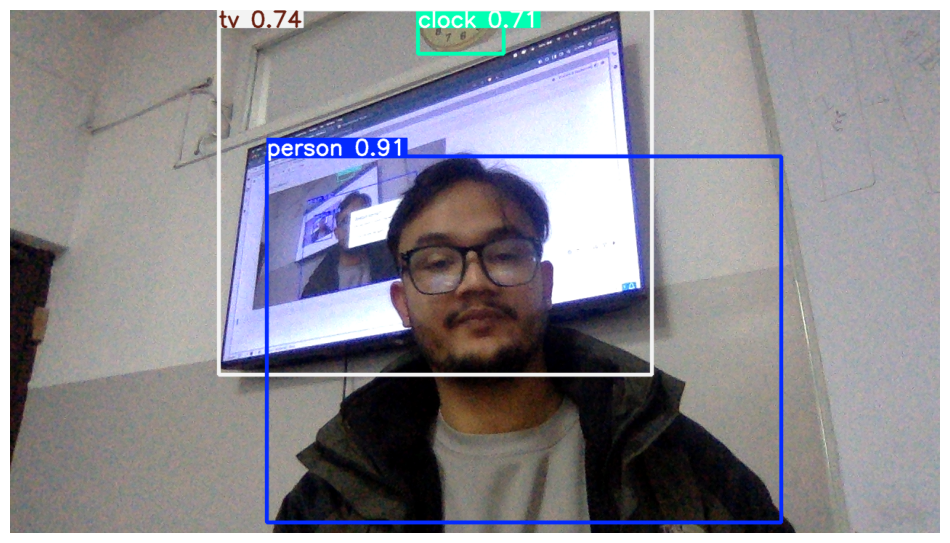

In [ ]:
run_yolo_webcam()